# Radial trees process and visualisation

### 1. For every discussion find the connections between the posts.

Properties for deletion

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import re

def starting_characters(df):
    root=0
    level_char=[]
    for row in range(len(df)):
        
        text=df[0][row]
        text=text.strip()
        
        
        #skip the first comment if it is the decision on the request
        if text.startswith('{{discussion top|') or text.startswith('{{Discussion top|') or text.startswith('{{dtop|') or text.startswith('{{archive top|'):
            root=1
            continue
        
        if root==row:
            continue

        # print(text)
        separate=re.split('(\"|@|\'|\{|\}|\w+)', text)# to take the first characters that indicate the level of the post
        text_st=separate[0]
        text_st="".join(text_st.split())# to remove space and \n
        #text_st=text_st.replace('=',"")
        punctuations = '''!()-[]{};—'"\+,<>./?@$%^&_~'''
        for character in punctuations:
            text_st = text_st.replace(character, '')


        
        if text_st.count('*')<=1: 
            text_st=text_st.replace('*',"")
        if text_st.count('#')<=1 :
            text_st=text_st.replace('#',"")
    


        level=len(text_st)

        level_char.append(level)
    return level_char


def connections_csv(file,path,save_folder):
    df=pd.read_csv(str(path)+str(file), encoding='utf-8', header=None)
    l=starting_characters(df)
    edges=pd.DataFrame(columns=['node1','node2'])
    con={'node1':0, 'node2':1}
    edges=edges.append(con,ignore_index=True)

    

    row=1
    for i in range(1,len(l)):
        row += 1

        

        if l[i]==0:
            con={'node1':0, 'node2':row}
            edges=edges.append(con,ignore_index=True)
        elif l[i]>l[i-1]:
            con={'node1':row-1, 'node2':row}
            edges=edges.append(con,ignore_index=True)
        elif l[i]==l[i-1]:
            con={'node1':edges['node1'].iloc[i-1], 'node2':row}
            edges=edges.append(con,ignore_index=True)
        elif l[i]<l[i-1]:
            num=1
            while l[i]!=l[i-num]:
                # if l[i-num]==0:
                #     break
                num += 1 
            
            con={'node1':edges['node1'].iloc[i-num], 'node2':row}
            edges=edges.append(con,ignore_index=True)
        
    edges.to_csv(str(save_folder)+str(file[:-5])+'_connections.csv', encoding='utf-8', index=False,  mode='a', header=True)
    



In [ ]:
path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/properties_for_deletion/'
save_folder='/mnt/data/elisavetk/Wikidata_disagreements/radial_trees_connections/'

filename='filename_properties_for_deletion.txt'


file1 = open(filename, 'r') 
Lines = file1.readlines() 



#call the csv files from the TP_csv_ folder
for line in Lines:
    #extarct the space before and after the string name
    file=line[:-1]
    print("start: " +str(file))
    # file=' PropertyP2157 .csv'
    connections_csv(file,path,save_folder)
    print("finish: " +str(file))


Requests for comment

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import re

def starting_characters(df):
    level_char=[0,0] #this is for the first and second row that includes documentation and the second row is the central node
    # level_char=[0]*len(df)
    for row in range(2,len(df)):
        
        text=df[0][row]
        text=text.strip()
    
        
        # print(text)
        separate=re.split('(\"|@|\'|\{|\}|\w+)', text)# to take the first characters that indicate the level of the post
        text_st=separate[0]
        text_st="".join(text_st.split())# to remove space and \n
        #text_st=text_st.replace('=',"")
        punctuations = '''!()-[]{};—'"\+=,<>./?@$%^&_~'''
        for character in punctuations:
            text_st = text_st.replace(character, '')


        
        if text_st.count('*')<=1: 
            text_st=text_st.replace('*',"")
        if text_st.count('#')<=1 :
            text_st=text_st.replace('#',"")
    


        level=len(text_st)

        level_char.append(level)
    return level_char


def connections_csv(file,path,save_folder):
    df=pd.read_csv(str(path)+str(file), encoding='utf-8', header=None)
    l=starting_characters(df)
    edges=pd.DataFrame(columns=['node1','node2'])

    if len(l)>2:
        # con={'node1':0, 'node2':1}
        # edges=edges.append(con,ignore_index=True)
        edge_row=0
        level=1
        for i in range(2,len(l)):
            # print(df.iloc[i,0])
            if '==' in df.iloc[i,0]:
                l[i]=0
                con={'node1':1, 'node2':i}
                level=i
            elif l[i]==0:
                con={'node1':level, 'node2':i}
                # edges=edges.append(con,ignore_index=True)
            elif l[i]>l[i-1]:
                con={'node1':i-1, 'node2':i}
                # edges=edges.append(con,ignore_index=True)
            elif l[i]==l[i-1]:
                con={'node1':edges['node1'].iloc[edge_row-1], 'node2':i}
                # edges=edges.append(con,ignore_index=True)
            elif l[i]<l[i-1]:
                num=1
                flag=0
                while flag==0:
                    if l[i]==l[i-num] or l[i-num]==0:
                        if l[i]==l[i-num]:
                            con={'node1':edges['node1'].iloc[edge_row-num], 'node2':i}
                        else: con={'node1':level, 'node2':i}
                        flag=1
                    else:
                        num +=1

            #     if l[i]!=l[i-num]:
            #         if edges['node1'].iloc[edge_row-num]==1:
            #             con={'node1':edges['node1'].iloc[edge_row-num], 'node2':i}
            #             break
            #         else:
            #             num +=1
            #     else:
            #         con={'node1':edges['node1'].iloc[edge_row-num], 'node2':i}
            edge_row +=1
            edges=edges.append(con,ignore_index=True)
    else:
        con={'node1':1, 'node2':1}
        edges=edges.append(con,ignore_index=True)
        
    edges.to_csv(str(save_folder)+str(file[:-5])+'_connections.csv', encoding='utf-8', index=False,  mode='a', header=True)
    



In [ ]:
path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/requests_for_comment/'
save_folder='/mnt/data/elisavetk/Wikidata_disagreements/radial_trees_connections/radial_trees_requests_for_comment/'

filename='filename_requests_for_comment.txt'


file1 = open(filename, 'r') 
Lines = file1.readlines() 



#call the csv files from the TP_csv_ folder
for line in Lines:
    #extarct the space before and after the string name
    file=line[:-1]
    print("start: " +str(file))
    # file='Administativedivisionsandpopulatedplaces.csv'
    connections_csv(file,path,save_folder)
    print("finish: " +str(file))

 Property proposal

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import re

def starting_characters(df):
    level_char=[0]#this is for the first row that included documentation and is the central node
    # level_char=[0]*len(df)
    for row in range(1,len(df)):
        
        text=df[0][row]
        text=text.strip()
    
        
        # print(text)
        separate=re.split('(\"|@|\'|\{|\}|\w+)', text)# to take the first characters that indicate the level of the post
        text_st=separate[0]
        text_st="".join(text_st.split())# to remove space and \n
        #text_st=text_st.replace('=',"")
        punctuations = '''!()-[]{};—'"\+=,<>./?@$%^&_~'''
        for character in punctuations:
            text_st = text_st.replace(character, '')


        
        if text_st.count('*')<=1: 
            text_st=text_st.replace('*',"")
        if text_st.count('#')<=1 :
            text_st=text_st.replace('#',"")
    


        level=len(text_st)

        level_char.append(level)
    return level_char


def connections_csv(file,path,save_folder):
    df=pd.read_csv(str(path)+str(file), encoding='utf-8', header=None)
    l=starting_characters(df)
    edges=pd.DataFrame(columns=['node1','node2'])

    if len(l)>1:
        # con={'node1':0, 'node2':1}
        # edges=edges.append(con,ignore_index=True)
        edge_row=0
        level=0
        for i in range(1,len(l)):
            # print(df.iloc[i,0])
            if '==' in df.iloc[i,0]:
                l[i]=0
                con={'node1':0, 'node2':i}
                level=i
            elif l[i]==0:
                con={'node1':level, 'node2':i}
                # edges=edges.append(con,ignore_index=True)
            elif l[i]>l[i-1]:
                con={'node1':i-1, 'node2':i}
                # edges=edges.append(con,ignore_index=True)
            elif l[i]==l[i-1]:
                con={'node1':edges['node1'].iloc[edge_row-1], 'node2':i}
                # edges=edges.append(con,ignore_index=True)
            elif l[i]<l[i-1]:
                num=1
                flag=0
                while flag==0:
                    if l[i]==l[i-num] or l[i-num]==0:
                        if l[i]==l[i-num]:
                            con={'node1':edges['node1'].iloc[edge_row-num], 'node2':i}
                        else: con={'node1':level, 'node2':i}
                        flag=1
                    else:
                        num +=1

            #     if l[i]!=l[i-num]:
            #         if edges['node1'].iloc[edge_row-num]==1:
            #             con={'node1':edges['node1'].iloc[edge_row-num], 'node2':i}
            #             break
            #         else:
            #             num +=1
            #     else:
            #         con={'node1':edges['node1'].iloc[edge_row-num], 'node2':i}
            edge_row +=1
            edges=edges.append(con,ignore_index=True)
    else:
        con={'node1':1, 'node2':1}
        edges=edges.append(con,ignore_index=True)
        
    edges.to_csv(str(save_folder)+str(file[:-5])+'_connections.csv', encoding='utf-8', index=False,  mode='a', header=True)
    



In [ ]:
path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/property_proposal/'
save_folder='/mnt/data/elisavetk/Wikidata_disagreements/radial_trees_connections/radial_trees_property_proposal/'

filename='filename_property_proposal.txt'


file1 = open(filename, 'r') 
Lines = file1.readlines() 



#call the csv files from the TP_csv_ folder
for line in Lines:
    #extarct the space before and after the string name
    file=line[:-1]
    print("start: " +str(file))
    # file=' PropertyP2157 .csv'
    connections_csv(file,path,save_folder)
    print("finish: " +str(file))

### 2. H-index

Calculate the H-index for the radial trees

In [14]:
# https://www.geeksforgeeks.org/count-number-nodes-given-level-using-bfs/
#  Python3 program to print
# count of nodes at given level.
from collections import deque

adj = [[] for i in range(1001)]

def addEdge(v, w):
	
	# Add w to v’s list.
	adj[v].append(w)

	# Add v to w's list.
	adj[w].append(v)

def BFS(s, l):
	
	V = 200
	
	# Mark all the vertices
	# as not visited
	visited = [False] * V
	level = [0] * V

	for i in range(V):
		visited[i] = False
		level[i] = 0

	# Create a queue for BFS
	queue = deque()

	# Mark the current node as
	# visited and enqueue it
	visited[s] = True
	queue.append(s)
	level[s] = 0

	while (len(queue) > 0):
		
		# Dequeue a vertex from
		# queue and print
		s = queue.popleft()
		#queue.pop_front()

		# Get all adjacent vertices
		# of the dequeued vertex s.
		# If a adjacent has not been
		# visited, then mark it
		# visited and enqueue it
		for i in adj[s]:
			if (not visited[i]):

				# Setting the level
				# of each node with
				# an increment in the
				# level of parent node
				level[i] = level[s] + 1
				visited[i] = True
				queue.append(i)

	count = 0
	for i in range(V):
		if (level[i] == l):
			count += 1
			
	return count

def H_index(connections):
	for i in range(len(connections)):
		addEdge(connections['node1'][i],connections['node2'][i])

	flag=0
	level=1
	previous_level_size=0
	while flag!=1:
		root = connections['node1'][0]
		level_size=BFS(root, level)
		# print(level_size)
		if level_size>=previous_level_size:
			level +=1
			previous_level_size=level_size
		else: flag=1
		
	return level


# # Driver code
# if __name__ == '__main__':
# 	H_index(connections)
# # 	# Create a graph given
# # 	# in the above diagram
# # 	# addEdge(0, 1)
# # 	# addEdge(0, 2)
# # 	# addEdge(1, 3)
# # 	# addEdge(2, 4)
# # 	# addEdge(2, 5)


	
# This code is contributed by mohit kumar 29


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


list_filenames=['filenames_radial_trees_properties_for_deletions.txt', 'filenames_radial_trees_property_proposal.txt', 'filenames_radial_trees_requests_for_comment.txt']
path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

stat_radial_trees=pd.DataFrame(columns=['filename','filetype','h_index'])
for file in list_filenames:
    file1 = open(str(path)+str(file), 'r') 
    Lines = file1.readlines() 

    #call the csv files from the TP_csv_ folder
    for line in Lines:
        #extarct the space before and after the string name
        file2=line[:-1]
        print("start: " +str(file2))
        # file=' PropertyP2157 .csv'
        connections=pd.read_csv(str(path)+str(file[10:-4])+'/'+str(file2), encoding='utf-8')
        if len(connections)>1:
            h=H_index(connections)
            row={'filename':file2,'filetype':file,'h_index':h}
        else: 
            row={'filename':file2,'filetype':file,'h_index':0}
        stat_radial_trees=stat_radial_trees.append(row,ignore_index=True)
        print("finish: " +str(file2))


stat_radial_trees.to_csv(str(path)+'stat_radial_trees.csv', encoding='utf-8', index=False,  mode='a', header=True)


### 3. Depth

Count the number of levels, the depth of the tree

In [ ]:
import pandas as pd
import networkx as nx
from networkx.algorithms.dag import dag_longest_path
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

list_filenames=['filenames_radial_trees_properties_for_deletions.txt', 'filenames_radial_trees_property_proposal.txt', 'filenames_radial_trees_requests_for_comment.txt']
path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

stat_radial_trees=pd.DataFrame(columns=['filename','depth'])
for file in list_filenames:
    file1 = open(str(path)+str(file), 'r') 
    Lines = file1.readlines() 

    #call the csv files from the TP_csv_ folder
    for line in Lines:
        #extarct the space before and after the string name
        file2=line[:-1]
        print("start: " +str(file2))
        print(str(path)+str(file[10:-4])+'/'+str(file2))
        # file='/mnt/data/elisavetk/Theme_2/ControversiesPaper/radial_trees_requests_for_comment/Interwikilinksforsubpage_connections.csv'
        connections=pd.read_csv(str(path)+str(file[10:-4])+'/'+str(file2), encoding='utf-8')
        # connections=pd.read_csv(str(path)+str(file[10:-4])+'/'+str(file2), encoding='utf-8')
        if len(connections)>1:
            G=nx.DiGraph()
            G.add_nodes_from(range(connections.loc[0,'node1'], connections.loc[len(connections)-1,'node2']))
            for i in range(len(connections)):
                G.add_edge(connections.loc[i,'node1'], connections.loc[i,'node2'])
            
            # #Find longest path in tree:
            level_path = dag_longest_path(G)
            # print(len(path))
            row={'filename':file2,'depth':len(level_path)}
        else:
            row={'filename':file2,'depth':0}
        stat_radial_trees=stat_radial_trees.append(row,ignore_index=True)
        print("finish: " +str(file2))

stat_radial_trees.to_csv(str(path)+'stat_radial_trees_depth.csv', encoding='utf-8', index=False,  mode='a', header=True)





connect stat_radial_trees_depth.csv with Controversial_annotation_stats.csv

In [12]:
# import pandas as pd

# path='/mnt/data/elisavetk/Theme_2/ControversiesPaper/'
# depth_data=pd.read_csv(str(path)+'stat_radial_trees_depth.csv', encoding='utf-8')
# stats=pd.read_csv(str(path)+'controversial_annotation_stats.csv', encoding='utf-8')

# new_data=pd.concat([stats, depth_data['depth']], axis=1)
# new_data.to_csv(str(path)+'controversial_annotation_stats_v2.csv', encoding='utf-8', index=False,  mode='a', header=True)


### 4. Statistical tests

Correlation matrix

In [4]:
import pandas as pd

path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

data=pd.read_csv(str(path)+'controversial_annotation_stats_v2.csv', encoding='utf-8')
data.columns=['filename','filetype','h-index','controversy label','#posts', '#words', '#editors', 'duration', 'depth']
corrM=data[['controversy label','h-index', 'depth','#posts', '#editors', 'duration']].corr(method='spearman')
corrM

,controversy label,h-index,depth,#posts,#editors,duration
controversy label,1.000000,0.454756,0.694819,0.716926,0.697609,0.524276
h-index,0.454756,1.000000,0.723427,0.709330,0.602230,0.504766
depth,0.694819,0.723427,1.000000,0.894013,0.781520,0.574131
#posts,0.716926,0.709330,0.894013,1.000000,0.936848,0.626309
#editors,0.697609,0.602230,0.781520,0.936848,1.000000,0.594268
duration,0.524276,0.504766,0.574131,0.626309,0.594268,1.000000


(array([45.,  7.,  5.,  1.,  4.,  2.,  0.,  1.,  2.,  2.]),
 array([   0. ,  104.5,  209. ,  313.5,  418. ,  522.5,  627. ,  731.5,
         836. ,  940.5, 1045. ]),
 <BarContainer object of 10 artists>)

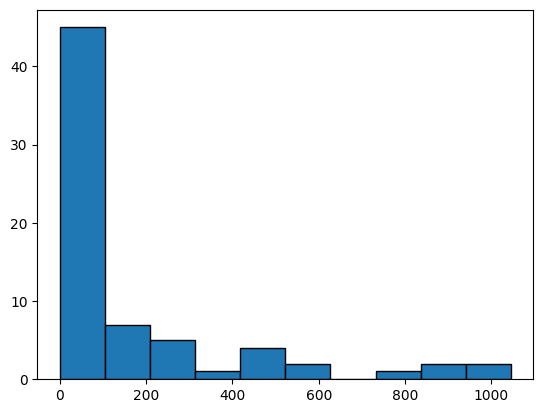

In [11]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
# lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(data['duration'], edgecolor='black')

In [12]:
from scipy.stats import shapiro 

shapiro(data['duration'])

ShapiroResult(statistic=0.650403618812561, pvalue=1.538091702613098e-11)

### 5. Visualisation

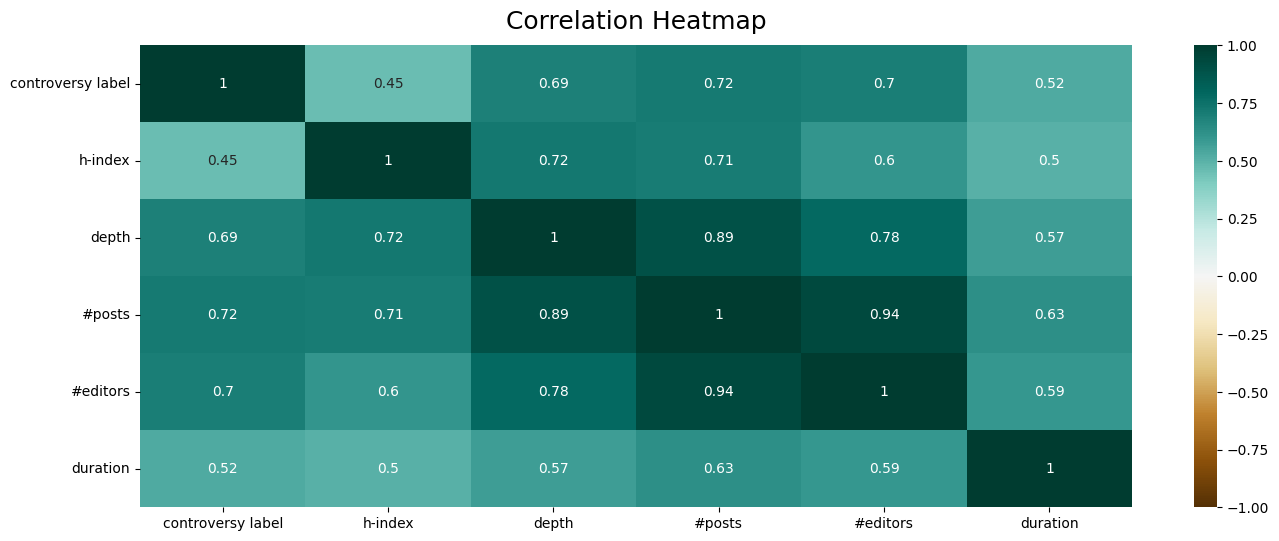

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data[['controversy label','h-index', 'depth','#posts', '#editors', 'duration']].corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/heatmap_controversies_spearman.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_408670/4267543264.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


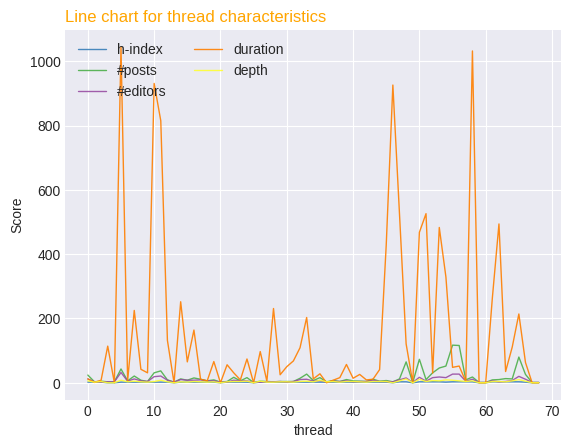

In [7]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

df=pd.read_csv(str(path)+'controversial_annotation_stats_v2.csv', encoding='utf-8')
df.columns=['filename','filetype','h-index','controversy index','#posts', '#words', '#editors', 'duration', 'depth']

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df.drop(['controversy index', 'filetype', 'filename', '#words'], axis=1):
    num+=1
    plt.plot(df.index, df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Line chart for thread characteristics", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("thread")
# plt.yscale('log')
plt.ylabel("Score")

# Show the graph
plt.show()

In [12]:
df_ac=df.sort_values(by='h-index', ascending=True)
df_ac

,filename,filetype,h-index,controversy index,#posts,#words,#editors,duration,depth
68,Wikidataandschemaorgareincompatibl_connections...,filenames_radial_trees_requests_for_comment.txt,0,0,1,551,1,0.0,0
20,PropertyP93_connections.csv,filenames_radial_trees_properties_for_deletion...,0,0,2,27,2,0.0,0
13,PfDPropertyQ87727973_connections.csv,filenames_radial_trees_properties_for_deletion...,0,0,2,59,2,0.0,0
67,Usepropertyorqualifierforillnessseverit_connec...,filenames_radial_trees_requests_for_comment.txt,0,0,1,101,1,0.0,0
49,Deuxliensallocin_connections.csv,filenames_radial_trees_requests_for_comment.txt,0,0,1,62,1,0.0,0
...,...,...,...,...,...,...,...,...,...
53,HandlingofstoredIDsaftertheyvebeendeletedorred...,filenames_radial_trees_requests_for_comment.txt,3,1,46,5216,18,483.0,6
52,GuidelinesforRfCproces_connections.csv,filenames_radial_trees_requests_for_comment.txt,3,1,31,2294,16,30.0,7
51,Guidanceneededforproperinterwikilinkag_connect...,filenames_radial_trees_requests_for_comment.txt,3,0,10,432,5,526.0,4
48,DataqualityframeworkforWikidat_connections.csv,filenames_radial_trees_requests_for_comment.txt,3,1,65,8627,15,121.0,12


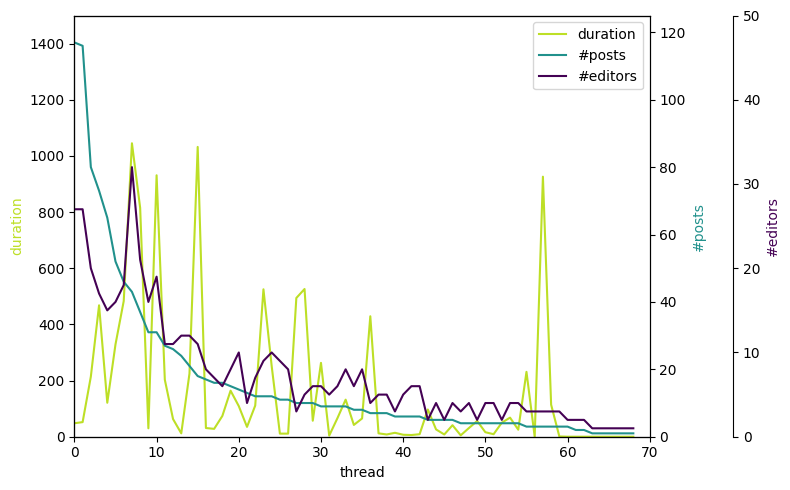

In [4]:

# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


path='//mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

df=pd.read_csv(str(path)+'controversial_annotation_stats_v2.csv', encoding='utf-8')
df.columns=['filename','filetype','h-index','controversy index','#posts', '#words', '#editors', 'duration', 'depth']

df_ac=df.sort_values(by='#posts', ascending=False)
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# par4 = host.twinx()
    
host.set_xlim(0,70)
host.set_ylim(0,1500)
par1.set_ylim(0,125)
par2.set_ylim(0,50)
# par3.set_ylim(0,1500)
# par4.set_ylim(0,15)
    
host.set_xlabel("thread")
host.set_ylabel("duration")
par1.set_ylabel("#posts")
par2.set_ylabel("#editors")
# par3.set_ylabel("duration")
# par4.set_ylabel("depth")

color1 = plt.cm.viridis(0.9)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0)
# color4 = plt.cm.viridis(.12)
# color5 = plt.cm.viridis(.20)

p1, = host.plot(df.index, df_ac['duration'],    color=color1, label="duration")
p2, = par1.plot(df.index, df_ac['#posts'],    color=color2, label="#posts")
p3, = par2.plot(df.index, df_ac['#editors'], color=color3, label="#editors")
# p4, = par3.plot(df.index, df_ac['duration'], color=color4, label="duration")
# p5, = par4.plot(df.index, df_ac['depth'], color=color5, label="depth")

lns = [p1, p2, p3]
# lns = [p1, p2, p3, p4, p5]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
# par3.spines['right'].set_position(('outward', 120))
# par4.spines['left'].set_position(('outward', 60))

# no x-ticks                 
# par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())
# par4.yaxis.label.set_color(p5.get_color())

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)

# Best for professional typesetting, e.g. LaTeX
# plt.savefig('/mnt/data/elisavetk/Theme_2/ControversiesPaper/line_chart.png', dpi=300, bbox_inches='tight')
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=200)'

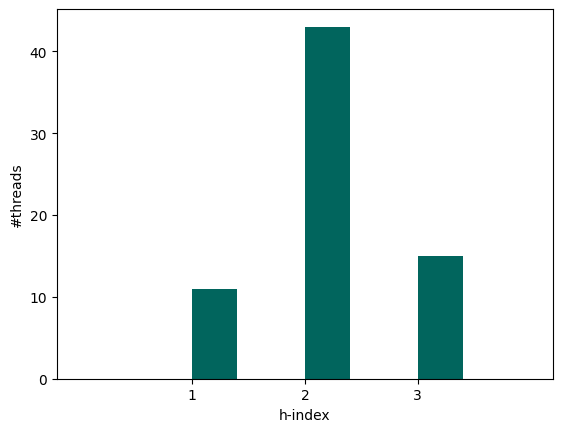

In [21]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

df=pd.read_csv(str(path)+'controversial_annotation_stats_v2.csv', encoding='utf-8')
df.columns=['filename','filetype','h-index','controversy index','#posts', '#words', '#editors', 'duration', 'depth']




color1 = plt.cm.BrBG(0.9)
color2 = plt.cm.Blues(0.5)
color3 = plt.cm.Blues(0.3)
  

# plotting two histograms on the same axis
# plt.figure(figsize=(3,8))
plt.hist(df['h-index'],bins=range(5),width=0.4, color=color1)
# plt.hist(df['depth'],  bins=np.arange(min(df['depth']), max(df['depth']) + binwidth, binwidth),  alpha=0.45, color='blue')
  
plt.ylabel('#threads')
plt.xlabel('h-index')
plt.xticks(range(1,4))


plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/hIndex_hist.png', dpi=300, bbox_inches='tight')  
plt.show()


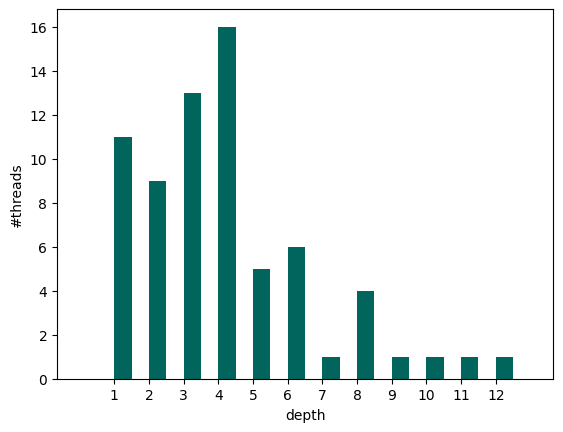

In [20]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/'

df=pd.read_csv(str(path)+'controversial_annotation_stats_v2.csv', encoding='utf-8')
df.columns=['filename','filetype','h-index','controversy index','#posts', '#words', '#editors', 'duration', 'depth']




color1 = plt.cm.BrBG(0.9)
color2 = plt.cm.Blues(0.5)
color3 = plt.cm.Blues(0.3)
  

# plotting two histograms on the same axis
# plt.figure(figsize=(3,8))
plt.hist(df['depth'],bins=range(14),width=0.5, color=color1)
# plt.hist(df['depth'],  bins=np.arange(min(df['depth']), max(df['depth']) + binwidth, binwidth),  alpha=0.45, color='blue')
  
plt.ylabel('#threads')
plt.xlabel('depth')
plt.xticks(range(1,13))


plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/depth_hist.png', dpi=300, bbox_inches='tight')  
plt.show()


Normallity test to check the data distribution and decide wihich test to use 

(not Gaussian (non normal) distribution goes with nonparametric statistical test)

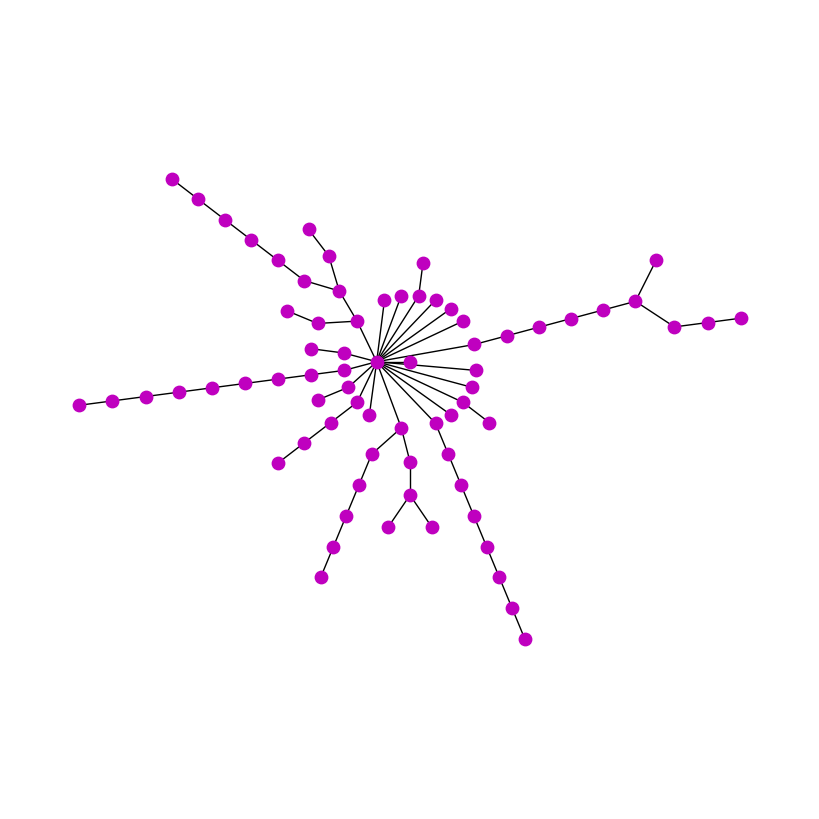

In [4]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/radial_trees_requests_for_comment/'

connections=pd.read_csv(str(path)+'Findagraveremovedasasourceforinformatio_connections.csv')

G=nx.Graph()
for i in range(len(connections)):
    G.add_edge(connections['node1'][i],connections['node2'][i])


pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=connections['node1'][0])
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=80, alpha=1, node_color="m", with_labels=False)
plt.axis("equal")
plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/find_a_gravve_radial_trees_poster.png')
plt.show()

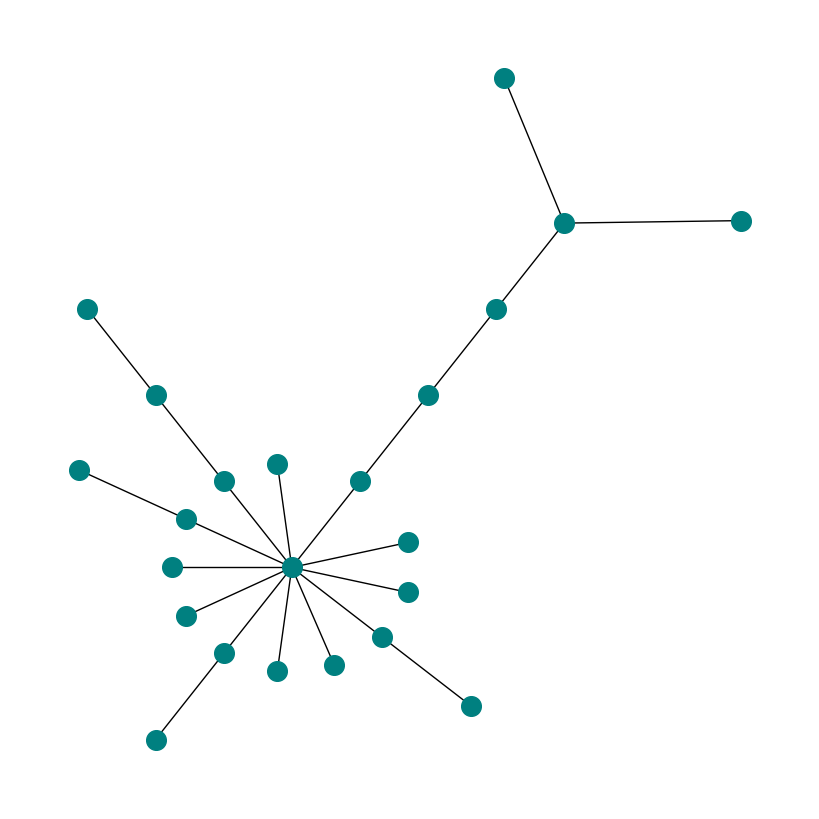

In [13]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/radial_trees_properties_for_deletions/'

connections=pd.read_csv(str(path)+' P107_connections.csv')

G=nx.Graph()
for i in range(len(connections)):
    G.add_edge(connections['node1'][i],connections['node2'][i])


pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=connections['node1'][0])
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=200, alpha=1, node_color="teal", with_labels=False)
# plt.axis("equal")
plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/P107_green.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/radial_trees_properties_for_deletions/ PropertyP2157_connections.csv'

connections=pd.read_csv(str(path)+' PropertyP2157_connections.csv')

G=nx.Graph()
for i in range(len(connections)):
    G.add_edge(connections['node1'][i],connections['node2'][i])


pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=connections['node1'][0])
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=80, alpha=1, node_color="m", with_labels=False)
plt.axis("equal")
plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/PropertyP2157.png')
plt.show()

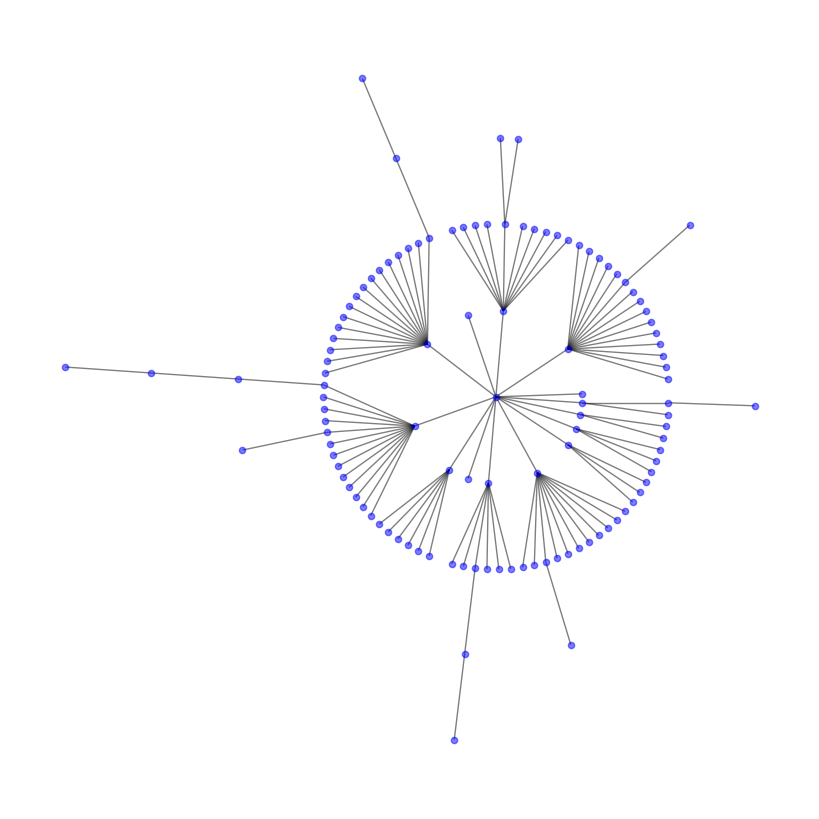

In [6]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/radial_trees_requests_for_comment/'

connections=pd.read_csv(str(path)+'Interwikilinksforsubpage_connections.csv')

G=nx.Graph()
for i in range(len(connections)):
    G.add_edge(connections['node1'][i],connections['node2'][i])


pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=connections['node1'][0])
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/Interwikilinksforsubpage_non_contorversial.png')
plt.show()

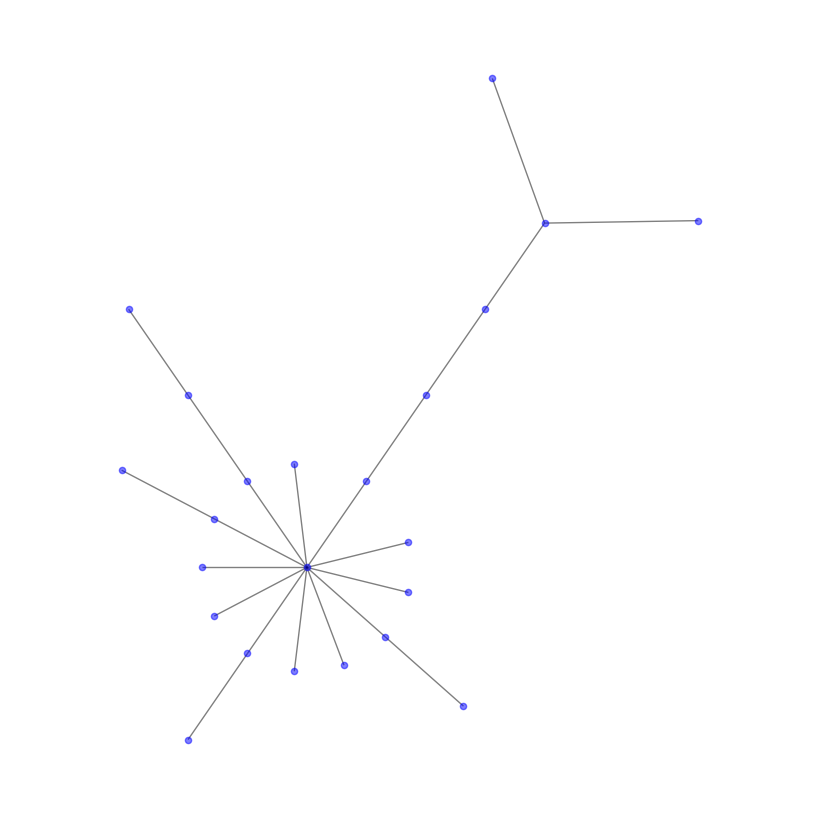

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/radial_trees_properties_for_deletions/'

connections=pd.read_csv(str(path)+' P107_connections.csv')

G=nx.Graph()
for i in range(len(connections)):
    G.add_edge(connections['node1'][i],connections['node2'][i])


pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=connections['node1'][0])
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/property_deletion_controversial_P107.png')
plt.show()

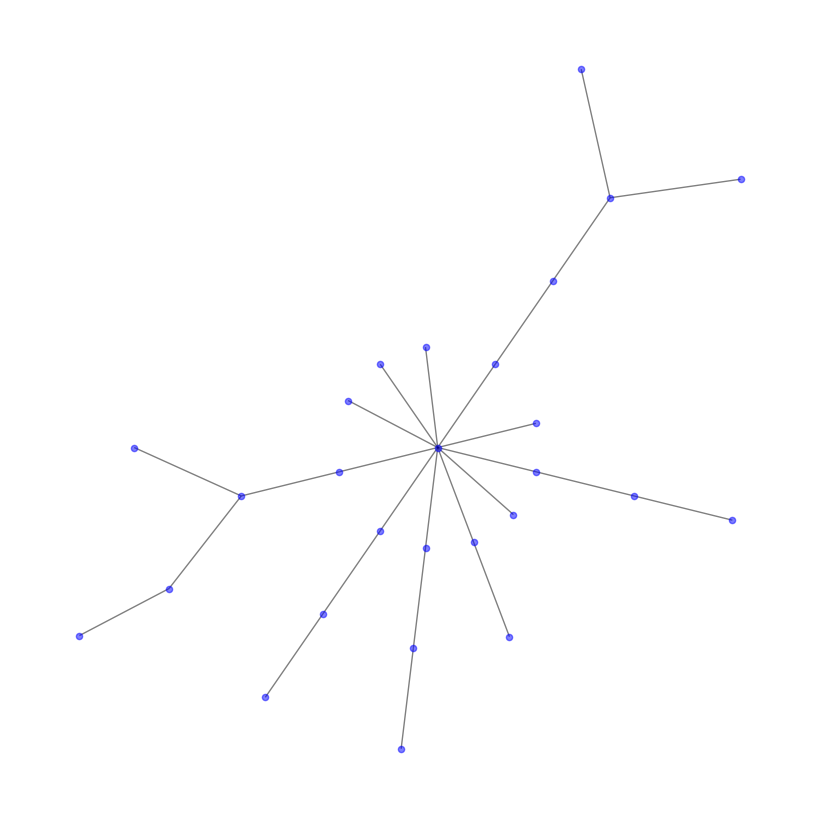

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


path='/mnt/data/elisavetk/Wikidata_disagreements/raw_data/radial_trees_property_proposal/'

connections=pd.read_csv(str(path)+'grammaticalnumbe_connections.csv')

G=nx.Graph()
for i in range(len(connections)):
    G.add_edge(connections['node1'][i],connections['node2'][i])


pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=connections['node1'][0])
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/property_proposal_controversial_grammaticalnumbe.png')
plt.show()